## I. 문제 정의
* <b>프로젝트 주제 및 선정 이유</b>
  * 주제: 2030 세대의 내 집 마련을 위한 부동산 및 금융 시장 분석
  * 선정 이유: 2030 세대의 주택 마련 문제는 중요한 사회 이슈로, 이를 대한민국 경제 상황 파악을 통해 근본적으로 이해하고 현실적인 해결책을 탐색하고자 하였습니다.
  <br/><br/>
* <b>질문사항 및 의문사항</b>  
  * <u>2030 세대의 집 마련이 어려운 이유는 무엇인가?</u>
  * 금리와 물가, 실업률과 취업률 변동 사항을 통한 경기 상황 파악
  * 서울 아파트 평균 매매가격과 가구당 평균 소득 비교를 통한 실질적인 상황 인식
  * 2030 청약 신청자와 당첨자 통계를 통한 청약 당첨 가능성 확인
  * 서울시 청약 투기 과열지구와 상위 매매 가격 아파트 자치구의 상관관계
  <br/><br/>
* <b>결과가 어디에 사용되며 왜 필요한가?</b>
  * 2030 세대의 주택 마련 문제에 대한 정부 정책 수립에 도움을 줄 수 있음  
  * 2030 세대가 자신의 주택 구입 전략을 세우는 데 활용할 수 있을 것으로 기대

## II. 데이터 수집
* <b>한국 정부에서 제공하는 공공데이터 : https://www.data.go.kr </b>
  * 한국부동산원 청약 APT 분양 정보: https://www.data.go.kr/data/15101046/fileData.do
  * 한국부동산원 지역별 청약 신청자 정보: https://www.data.go.kr/data/15110975/fileData.do
  * 한국부동산원 지역별 청약 당첨자 정보: https://www.data.go.kr/data/15110976/fileData.do
    <br/><br/>
  
* <b>통계청에서 공개하는 데이터 : https://kosis.kr/ </b>
  * 2023년 2분기 가구당 월평균 가계수지  
    <i>(조회: 항목 - 전체가구, 가계수지항목별 - 소득 & 소비지출, 시점 - 2023.2/4 선택후, 행렬전환: 표측 - 항목, 표두 - 가계수지항목별)</i>  
    : https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1L9U001&conn_path=I2  
  * 2020-2022년 기대수명  
    <i>(조회: 항목 - 기대여명(전체), 연령별 - 0, 시점 - 2020 ~ 2022 선택후, 행렬전환: 표측 - 시점, 표두 - 연령별)</i>  
    : https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B41&conn_path=I2
    <br/><br/>
    
* <b>서울 열린데이터 광장 : https://data.seoul.go.kr/ </b>
  * 서울시 아파트(매매) 실거래가 정보<i>(필드명: 건물용도, 검색명: 아파트 조회)</i>  
    : https://data.seoul.go.kr/dataList/OA-21275/S/1/datasetView.do
    <br/><br/>
  
* <b>한국은행 경제통계시스템 : https://ecos.bok.or.kr/ </b>  
  <i>[직종별 평균임금.csv]를 제외한 모든 csv 파일은 분기(2020/Q3 ~ 2023/Q2)로 조회후, 저장하였습니다.</i>  
  * 한국은행 기준금리: https://ecos.bok.or.kr/#/Short/46c618
  * 한국 취업자수<i>(정수 조회)</i>   
    : https://ecos.bok.or.kr/#/Short/992376  
  * 한국 실업률: https://ecos.bok.or.kr/#/Short/a76fdb
  * 한국 소비자 물가지수: https://ecos.bok.or.kr/#/Short/0d4c86
  * 직종별 평균임금<i>(년도: 2020 ~ 2022, 단위: 백만원, 소수점 2자리 조회)</i>    
    : https://ecos.bok.or.kr/#/Short/ae516e  

## III. 라이브러리 선언

In [1]:
#'folium' 라이브러리 설치
!pip install folium

In [2]:
# 분석 과정에 필요한 라이브러리 선언
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import MarkerCluster

# 차트에 한글 지원하기
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 지원 For MacOS
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## IV. 세부 주제별 데이터 분석 과정

## 1. 경기 상황 파악하기

### (1) 데이터 읽어오기
- 금리, 물가, 실업률, 취업자수, 직종별 평균임금 csv 파일 읽고 데이터 확인하기

In [3]:
# 데이터 불러오기
interest = pd.read_csv('/Users/im_gyuh2/data/한국은행 기준금리.csv', encoding='UTF-8')
price = pd.read_csv('/Users/im_gyuh2/data/한국 소비자 물가지수.csv', encoding='UTF-8')
unemployment = pd.read_csv('/Users/im_gyuh2/data/한국 실업률.csv', encoding='UTF-8')
employee = pd.read_csv('/Users/im_gyuh2/data/한국 취업자수.csv', encoding='UTF-8')
pay = pd.read_csv('/Users/im_gyuh2/data/직종별 평균임금.csv', encoding='UTF-8')

In [4]:
# 금리 상위 데이터 행 확인하기
interest.head()

,변환,원자료
0,2020/Q3,0.50
1,2020/Q4,0.50
2,2021/Q1,0.50
3,2021/Q2,0.50
4,2021/Q3,0.75


In [5]:
# 물가 상위 데이터 행 확인하기
price.head()

,변환,원자료
0,2020/Q3,115.99
1,2020/Q4,116.01
2,2021/Q1,117.50
3,2021/Q2,118.12
4,2021/Q3,118.93


In [6]:
# 실업률 상위 데이터 행 확인하기
unemployment.head()

,변환,원자료
0,2020/Q3,4.0
1,2020/Q4,4.2
2,2021/Q1,4.3
3,2021/Q2,3.8
4,2021/Q3,3.2


In [7]:
# 취업자수 상위 데이터 행 확인하기
employee.head()

,변환,원자료
0,2020/Q3,"26,824"
1,2020/Q4,"26,887"
2,2021/Q1,"26,890"
3,2021/Q2,"27,249"
4,2021/Q3,"27,396"


In [8]:
# 평균임금 데이터 행 확인하기
pay

,변환,원자료,원자료.1,원자료.2,원자료.3
0,2020,4.35,4.19,1.93,3.40
1,2021,4.40,4.35,1.97,3.48
2,2022,4.64,4.56,2.09,3.59


### (2) 데이터 준비

In [9]:
# 열이름 변경하고 현재 테이블에 결과 반영하기

# 금리
interest.rename(columns={'변환': '년도/분기', '원자료': '금리'}, inplace = True)

# 물가
price.rename(columns={'변환': '년도/분기', '원자료': '물가'}, inplace = True)

# 실업률
unemployment.rename(columns={'변환': '년도/분기', '원자료': '실업률'}, inplace = True)

# 취업자수
employee.rename(columns={'변환': '년도/분기', '원자료': '취업자수'}, inplace = True)

# 직종별 평균임금 
# 원자료로 저장된 열이름을 직종명으로 변경한 후, 임금 변동률 확인만 진행
pay.rename(columns={'변환':'년도', '원자료':'전문직', '원자료.1':'사무직', '원자료.2':'서비스직','원자료.3':'판매직'}, inplace = True)
pay

,년도,전문직,사무직,서비스직,판매직
0,2020,4.35,4.19,1.93,3.40
1,2021,4.40,4.35,1.97,3.48
2,2022,4.64,4.56,2.09,3.59


### (3) 데이터 탐색

#### 1) 금리 선 그래프 생성
- 분기별 금리 변동 추이 시각화
- 선 그래프 선택 이유 
    - 시간에 따른 금리 변동 패턴을 명확하게 보여주기 위함
    - 어떤 특정 시기에 금리가 상승하거나 하락하였는지 쉽게 파악 가능

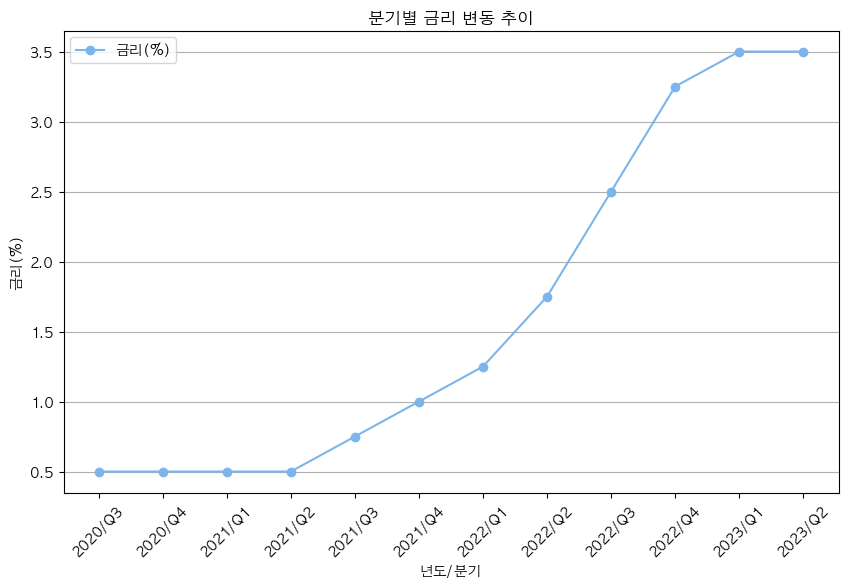

In [10]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# '년도/분기'와 '금리'를 이용해 선 그래프 생성, 색상과 마커 설정 및 범례 지정
plt.plot(interest['년도/분기'], interest['금리'], color='#7CB5EC', marker='o', label='금리(%)') 

# 그래프 제목
plt.title('분기별 금리 변동 추이')

# x축 라벨
plt.xlabel('년도/분기')

# x축 라벨 45도 회전
plt.xticks(rotation=45) 

# y축 라벨
plt.ylabel('금리(%)')

# y축을 기준으로 그리드 표시
plt.grid(True, axis='y')

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()

#### 2) 물가 선 그래프 생성
- 분기별 물가 변동 추이 시각화
- 선 그래프 선택 이유 
    - 시간에 따른 물가 변동 패턴을 명확하게 보여주기 위함
    - 어떤 특정 시기에 물가가 상승하거나 하락하였는지 쉽게 파악 가능

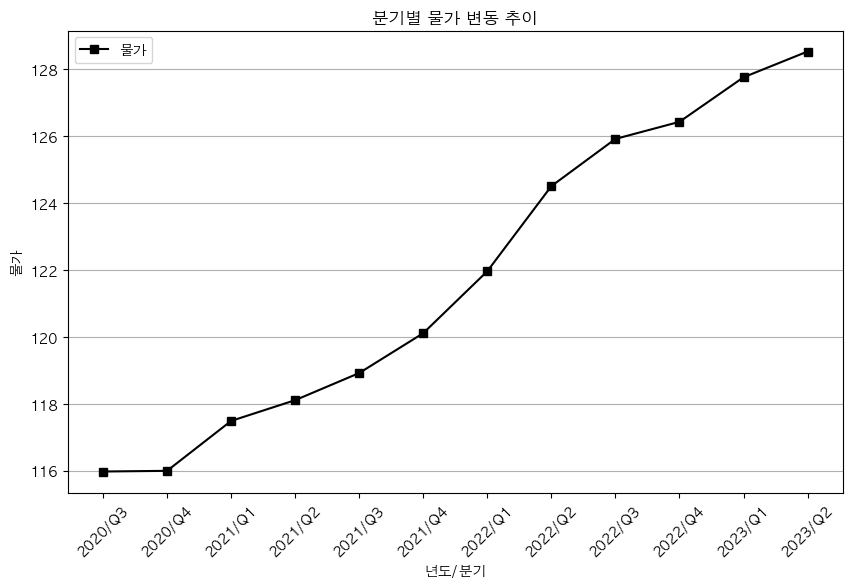

In [11]:
plt.figure(figsize=(10, 6))

# '년도/분기'와 '물가'를 이용해 선 그래프 생성, 색상과 마커 설정 및 범례 지정
plt.plot(price['년도/분기'], price['물가'], color='black', marker='s', label='물가') 
plt.title('분기별 물가 변동 추이')
plt.xlabel('년도/분기')
plt.xticks(rotation=45) 
plt.ylabel('물가')
plt.grid(True, axis='y')
plt.legend()
plt.show()

#### 3) 금리 & 물가 선 그래프 비교
- 분기별 금리와 물가 변동 추이를 동시에 시각화
- 서로 다른 2개의 y축을 사용하여 금리와 물가를 동시에 그래프에 표시
- 시간에 따른 물가와 금리 변동 패턴을 함께 파악하여 물가와 금리 사이에 어떤 관계가 있는지 쉽게 파악 가능

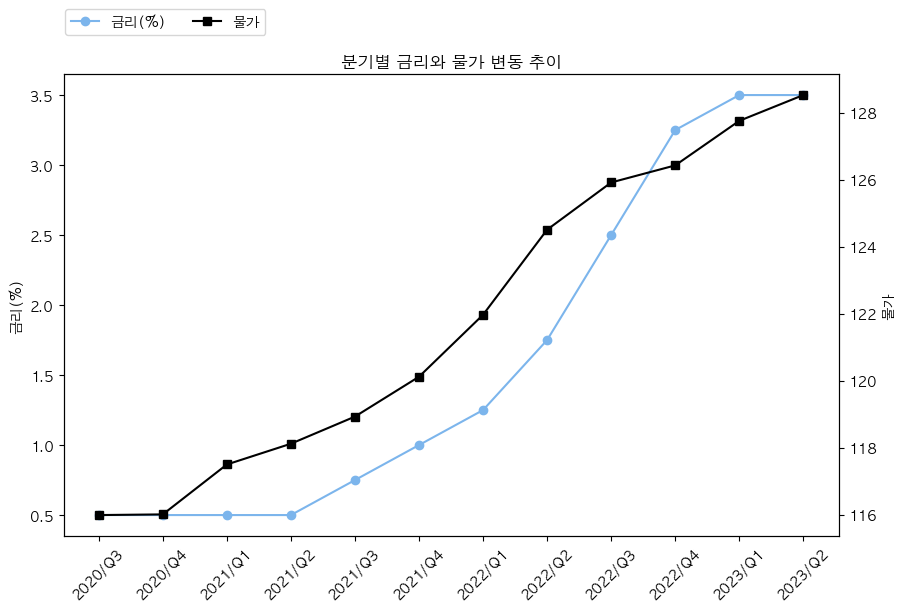

In [12]:
# 금리와 물가 비교를 위한 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(10, 6))

# '년도/분기'와 '금리'를 이용해 선 그래프 생성, 색상과 마커 설정 및 범례 지정
# 1번째 y축(ax1)에 대한 선 그래프
ax1.plot(interest['년도/분기'], interest['금리'], color='#7CB5EC', marker='o', label='금리(%)')

# 첫 번째 y축 라벨
ax1.set_ylabel('금리(%)')

# '년도/분기'와 '물가'를 이용해 선 그래프 생성, 색상과 마커 설정 및 범례 지정
# 2번째 y축(ax2)에 대한 선 그래프 -> ax2는 ax1의 복제본(x축 공유)
ax2 = ax1.twinx()
ax2.plot(price['년도/분기'], price['물가'], color='black', marker='s', label='물가')

# 두 번째 y축 라벨
ax2.set_ylabel('물가')
plt.title('분기별 금리와 물가 변동 추이')

# x축 위치를 고정 및 레이블 설정
ax1.set_xticks(range(len(interest['년도/분기'])))
ax1.set_xticklabels(interest['년도/분기'], rotation=45)

# x축 라벨
plt.xlabel('년도/분기')

# 범례 위치를 설정 및 그래프 출력
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 1), ncol=2)
plt.show()

#### 4) 실업률 선 그래프 생성
- 분기별 실업률 변동 추이 시각화
- 선 그래프 선택 이유 
    - 시간에 따른 실업률 변동 패턴을 명확하게 보여주기 위함
    - 어떤 특정 시기에 실업률이 상승하거나 하락하였는지 쉽게 파악 가능

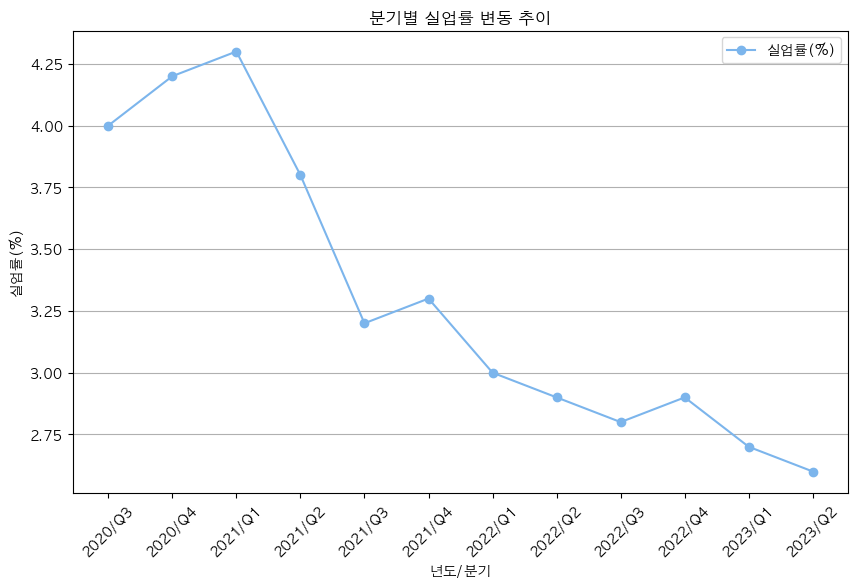

In [13]:
plt.figure(figsize=(10, 6))

# '년도/분기'와 '실업률'를 이용해 선 그래프 생성, 색상과 마커 설정 및 범례 지정
plt.plot(unemployment['년도/분기'], unemployment['실업률'], color='#7CB5EC', marker='o', label='실업률(%)') 
plt.title('분기별 실업률 변동 추이')
plt.xlabel('년도/분기')
plt.xticks(rotation=45)  
plt.ylabel('실업률(%)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

#### 5) 취업자수 막대 그래프 생성
- 분기별 취업자 수 변동 추이 시각화
- 막대 그래프 선택 이유 
    - 각 분기별 취업자 수를 명확하게 비교하고 보여주기 위함
    - 어떤 분기에 취업자 수가 많았는지, 어떤 분기에 취업자 수가 적었는지 쉽게 파악 가능

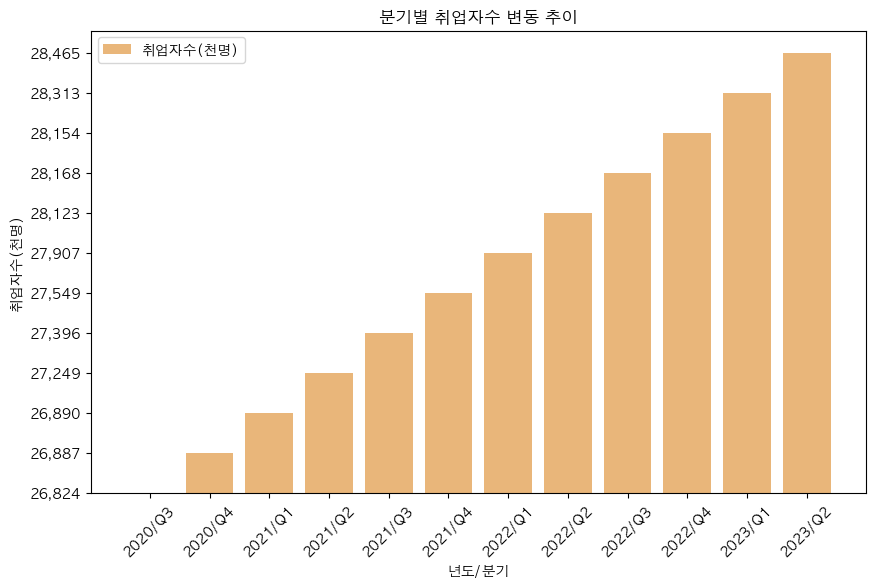

In [14]:
plt.figure(figsize=(10, 6))
# '년도/분기'와 '취업자수'를 이용해 막대 그래프 생성, 색상 설정 및 범례 지정
plt.bar(employee['년도/분기'], employee['취업자수'], color='#E9B67A', label='취업자수(천명)')
plt.title('분기별 취업자수 변동 추이')
plt.xlabel('년도/분기')
plt.xticks(rotation=45)  
plt.ylabel('취업자수(천명)')
plt.legend()
plt.show()

#### 6) 취업자수(막대) & 실업률(선) 그래프 비교
- 분기별 금리와 물가 변동 추이를 동시에 시각화
- 서로 다른 2개의 y축을 사용하여 금리와 물가를 동시에 그래프에 표시
- 시간에 따른 물가와 금리 변동 패턴을 함께 파악하여 물가와 금리 사이에 어떤 관계가 있는지 쉽게 파악 가능

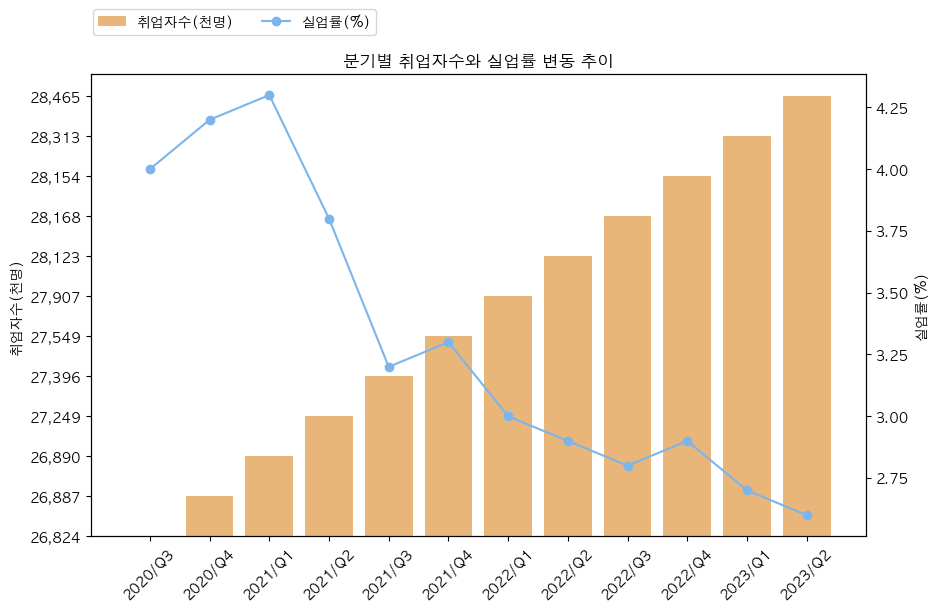

In [15]:
# 취업자 수와 실업률 비교를 위한 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(10, 6))

# '년도/분기'와 '취업자수'를 이용해 막대 그래프 생성, 색상 설정 및 범례 지정
# 1번째 y축(ax1)에 대한 막대 그래프
ax1.bar(employee['년도/분기'], employee['취업자수'], color='#E9B67A', label='취업자수(천명)')

# 첫 번째 y축 라벨
ax1.set_ylabel('취업자수(천명)')

# '년도/분기'와 '실업률'를 이용해 선 그래프 생성, 색상과 마커 설정 및 범례 지정
# 2번째 y축(ax2)에 대한 선 그래프 -> ax2는 ax1의 복제본(x축 공유)
ax2 = ax1.twinx()
ax2.plot(unemployment['년도/분기'], unemployment['실업률'], color='#7CB5EC', marker='o', label='실업률(%)')

# 두 번째 y축 라벨
ax2.set_ylabel('실업률(%)')
plt.title('분기별 취업자수와 실업률 변동 추이')

# x축 위치를 고정 및 레이블 설정
ax1.set_xticks(range(len(employee['년도/분기'])))
ax1.set_xticklabels(employee['년도/분기'], rotation=45)

# x축 라벨
plt.xlabel('년도/분기')

# 범례 위치를 설정 및 그래프 출력
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 1), ncol=2)
plt.show()

### (4) 분석 결과
* <u>기준 금리와 물가</u>는 <b>상승</b>하는 추세를 보이고 있으며, <u>취업자 수</u>는 <b>증가</b>하고 있고 <u>실업률</u>은 <b>역대 최저치</b>를 기록
* 이는 고용 상황이 개선되고 있다는 긍정적인 측면을 보여주지만, 한편으로는 높은 물가와 금리로 인해 근로자들의 소득 대비 지출이 증가할 가능성을 시사

## 2. 경제 통찰하기

### (1) 데이터 읽어오기
- 서울 아파트 매매가격, 가구당 월평균 소득 및 소비지출, 기대수명 csv 파일 읽고 데이터 확인하기

In [16]:
# 데이터 불러오기
aptData = pd.read_csv('/Users/im_gyuh2/data/서울시 아파트(매매) 실거래가 정보.csv', encoding='EUC-KR')
avg_finance = pd.read_csv('/Users/im_gyuh2/data/2023년 2분기 가구당 월평균 가계수지.csv', encoding='UTF-8', header=1)
life = pd.read_csv('/Users/im_gyuh2/data/2020-2022년 기대수명.csv', encoding='UTF-8', header=1)

/var/folders/kx/04q364sj4wv35kf6q_j9q1040000gn/T/ipykernel_7661/2410177717.py:2: DtypeWarning: Columns (7,15,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  aptData = pd.read_csv('/Users/im_gyuh2/data/서울시 아파트(매매) 실거래가 정보.csv', encoding='EUC-KR')


In [17]:
# 서울 아파트 매매가격 상위 데이터 행 확인하기
aptData.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2023,11290,성북구,13700,상월곡동,1.0,대지,101.0,0.0,동아에코빌,...,57500,59.95,0.0,15,NaN,NaN,2003.0,아파트,중개거래,서울 성북구
1,2023,11110,종로구,17500,숭인동,1.0,대지,296.0,19.0,삼전솔하임2차,...,11000,14.69,0.0,8,NaN,NaN,2012.0,아파트,직거래,NaN
2,2023,11545,금천구,10300,시흥동,1.0,대지,1013.0,0.0,관악산벽산타운5,...,59000,84.97,0.0,18,NaN,NaN,2004.0,아파트,중개거래,서울 금천구
3,2023,11305,강북구,10200,번동,1.0,대지,139.0,0.0,해모로아파트,...,65000,127.25,0.0,10,NaN,NaN,2003.0,아파트,중개거래,서울 동대문구
4,2023,11710,송파구,10200,신천동,1.0,대지,11.0,0.0,장미2,...,193000,82.45,0.0,14,NaN,NaN,1979.0,아파트,중개거래,서울 송파구


In [18]:
# 가구당 월평균 소득 및 소비지출 데이터 행 확인하기
avg_finance

,항목,소득,소비지출
0,전체가구,4792979,2690633


In [19]:
# 기대수명 데이터 행 확인하기
life

,시점,기대여명(전체) (년)
0,2020,83.5
1,2021,83.6
2,2022,82.7


### (2) 데이터 준비 
### 1) <u>서울 아파트 매매가격</u> 

#### 1-1) 분기별 서울 아파트 매매가격을 분석하기 위한 전처리 작업
- 필요 없는 열 제거 및 필요한 열 추가
- [계약일]이 '2020-07-01' ~ '2023-06-30' 사이인 데이터만 선택
- [계약일]을 이용하여 각 데이터가 몇 분기에 해당하는지 파악
- 분기별 평균 서울 아파트 매매가격 도출
- 시간에 따른 서울 아파트 평균 거래 가격의 변동 패턴 분석

In [20]:
# 지도 시각화를 위한 '주소(동)' 열 추가
aptData['주소(동)'] = '서울특별시 ' + aptData['자치구명'] + ' ' + aptData['법정동명']

In [21]:
# 필요 없는 열 제거
aptData = aptData.drop(['접수연도', '자치구코드','법정동코드','법정동명', '지번구분','지번구분명', 
                        '본번','부번','건물명','건물면적(㎡)','토지면적(㎡)',
                        '층', '권리구분', '취소일', '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명'], axis=1)

In [22]:
# '계약일' 열을 날짜 형식으로 변환
aptData['계약일'] = pd.to_datetime(aptData['계약일'], format='%Y%m%d')

In [23]:
# query 함수를 사용하여 [계약일]이 '2020-07-01'과 '2023-06-30' 사이인 데이터만 선택
aptData = aptData.query("'2020-07-01' <= 계약일 <= '2023-06-30'")

# 인덱스 재설정
aptData.reset_index(drop=True, inplace=True)

In [24]:
# 열이름 변경
aptData.rename(columns={'자치구명': '자치구', '물건금액(만원)': '실거래가(만원)'}, inplace = True)
aptData.head()

,자치구,계약일,실거래가(만원),주소(동)
0,강동구,2023-06-30,115000,서울특별시 강동구 명일동
1,강서구,2023-06-30,124000,서울특별시 강서구 내발산동
2,노원구,2023-06-30,50500,서울특별시 노원구 상계동
3,강서구,2023-06-30,116000,서울특별시 강서구 화곡동
4,영등포구,2023-06-30,81000,서울특별시 영등포구 양평동4가


In [25]:
# '계약일'을 이용하여 분기(dt.to_period("Q") 함수 사용) 구하기
aptData['분기'] = aptData['계약일'].dt.to_period("Q").astype(str).str.replace('Q', '/Q')

# 분기별 평균(통계함수) 매매가격 구하기
avg_q = aptData.groupby('분기')['실거래가(만원)'].mean()
avg_q.head()

분기
2020/Q3     90806.727538
2020/Q4     99161.176798
2021/Q1     99961.779858
2021/Q2    100396.403981
2021/Q3    107737.498866
Name: 실거래가(만원), dtype: float64

#### 1-2) 자치구별 아파트 평균 매매가격 계산 및 지도 시각화를 위한 데이터 전처리 작업
- 자치구별로 평균 매매가격 계산
- 평균 매매가격이 가장 높은 자치구부터 내림차순으로 정렬
- 상위 자치구만 선택하여 새로운 데이터 프레임을 생성(apt_geo)
- [자치구]를 기준으로 'apt_geo'와 'aptData'를 병합하고, [자치구] 열 제거
- [주소(동)] 열을 기준으로 그룹화하고, 각 그룹의 평균 매매가격을 계산하여 csv 파일로 저장
- 전처리된 데이터를 활용하여 지도 시각화 및 상위 부동산 자치구 확인 가능

In [26]:
# 자치구별 평균(통계함수) 매매가격 구하기
# 1) groupby 함수를 사용하여 [자치구]를 기준으로 그룹화
# 2) [실거래가(만원)]의 평균 계산
avg_gu = aptData.groupby('자치구')['실거래가(만원)'].mean()

# 평균 매매가격이 가장 높은 자치구부터 내림차순으로 정렬
avg_gu = avg_gu.sort_values(ascending=False)

# 상위 자치구만 선택
top_avg_gu = avg_gu.head(len(avg_gu)-10)
top_avg_gu

자치구
강남구     204109.703172
서초구     200952.264803
용산구     183671.660386
송파구     146309.761071
성동구     133987.158167
광진구     115008.178468
마포구     112848.013858
동작구     104270.621766
양천구     101696.545091
영등포구     96643.371063
강동구      94872.821834
중구       91517.917178
종로구      88233.750000
서대문구     87418.382468
성북구      79343.758512
Name: 실거래가(만원), dtype: float64

In [27]:
# 지도 시각화를 위한 데이터 프레임 생성
apt_geo = top_avg_gu.to_frame()

# 인덱스를 칼럼으로 변경
apt_geo = apt_geo.reset_index()

# [자치구]를 기준으로 'apt_geo'와 'aptData' 병합
apt_geo = pd.merge(apt_geo, aptData[['자치구', '주소(동)']], on='자치구', how='left')

# [자치구] 열 제거
apt_geo = apt_geo.drop('자치구', axis=1)

# [실거래가(만원)] 열의 값 소수점 두 번째 자리까지 표시
apt_geo['실거래가(만원)'] = apt_geo['실거래가(만원)'].round(2)

# [주소(동)] 열을 기준으로 그룹화
apt_geo = apt_geo.groupby('주소(동)')

# 각 그룹의 평균(통계함수) 실거래가 계산
# 1) 그룹화된 데이터의 [실거래가(만원)]의 평균 계산
apt_geo = apt_geo['실거래가(만원)'].mean()

# 계산된 평균 가격을 데이터프레임으로 변환하고 인덱스 초기화
apt_geo = apt_geo.to_frame().reset_index()

# csv 파일로 저장(구글 스프레드 시트의 확장 프로그램 'Geocode'를 활용을 위함)
apt_geo.to_csv('서울 주요 자치구(동) 아파트 평균 매매가격.csv', index=False, encoding='utf-8-sig')

### (3) 데이터 탐색
### 1) <u>서울 아파트 매매가격</u>

#### 1-1) 분기별 서울 아파트 평균 매매가격  선 그래프 생성
- 분기별 서울 아파트 평균 매매가격 추이 시각화
- 선 그래프 선택 이유 
    - 시간에 따른 평균 매매가격 변동 패턴을 명확하게 보여주기 위함
    - 특정 시기에 평균 매매가격이 급등하거나 급락한 것이 있는지 쉽게 파악 가능

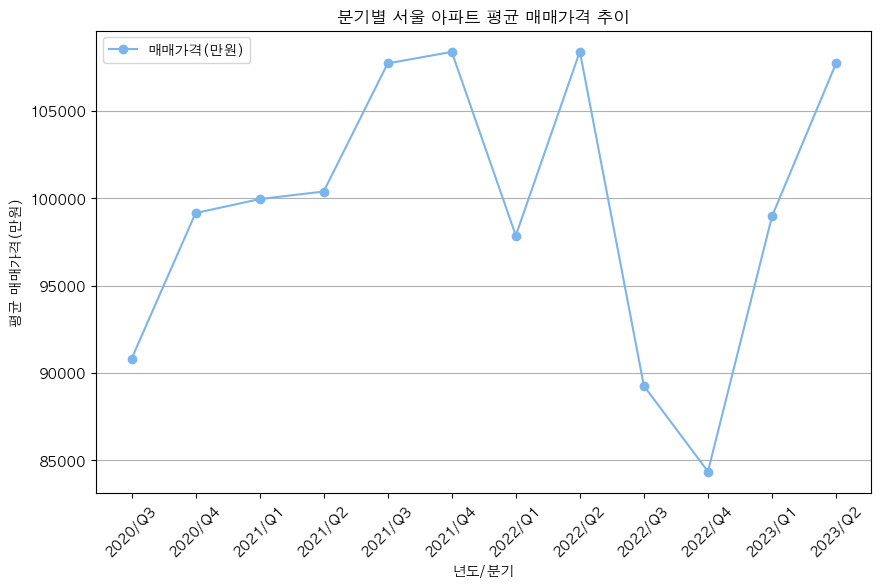

In [28]:
plt.figure(figsize=(10, 6))

# 'avg_q'의 인덱스와 값을 이용하여 선 그래프 생성, 색상과 마커 설정 및 범례 지정
plt.plot(avg_q.index.astype(str), avg_q, color='#7CB5EC', marker='o', label='매매가격(만원)')
plt.title('분기별 서울 아파트 평균 매매가격 추이')
plt.xlabel('년도/분기')
plt.ylabel('평균 매매가격(만원)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.legend(loc='upper left')
plt.show()

#### 1-2) 상위 부동산 자치구 막대 그래프 생성
- 서울 주요 자치구 아파트의 평균 매매가격을 시각화
- 막대 그래프 선택 이유 
    - 각 자치구별 평균 매매가격을 명확하게 비교하고 보여주기 위함
    - 어떤 자치구의 아파트 평균 매매가격이 높은지, 낮은지 쉽게 파악 가능

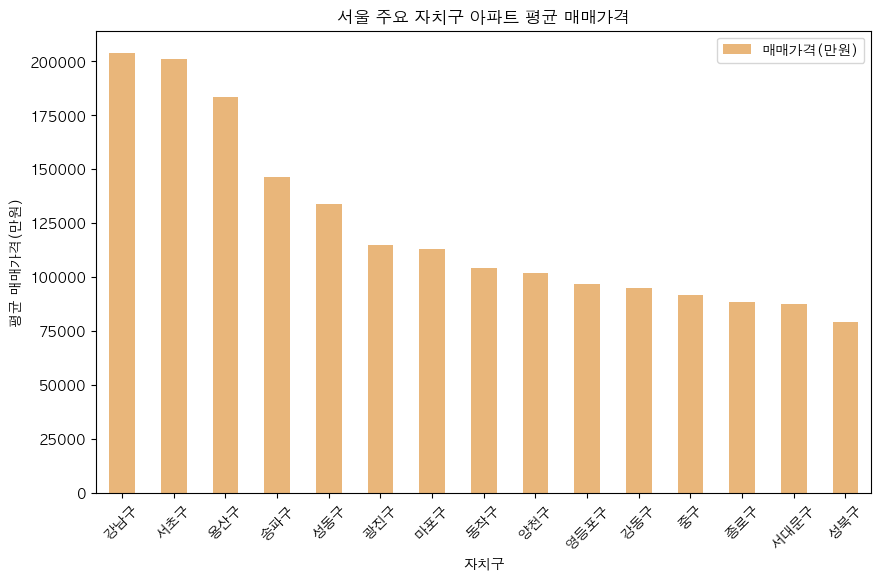

In [29]:
# 서울 주요 자치구 아파트 평균 매매가격을 막대 그래프로 생성, 색상 설정 및 범례 지정
top_avg_gu.plot(kind='bar', figsize=(10, 6), color='#E9B67A', label='매매가격(만원)')

plt.title('서울 주요 자치구 아파트 평균 매매가격')
plt.xlabel('자치구')
plt.ylabel('평균 매매가격(만원)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### (2) 데이터 준비 
### 2) <u>가구당 월평균 소득 및 소비지출</u> 
* 2023년 2분기를 기준으로 서울 아파트 평균 매매가격을 (가구당 월평균 소득 - 소비 지출)로 나누어, 평균적으로 한 가구가 서울 아파트를 구매하기 위해 필요한 시간을 계산하는 과정 
* [년도/분기]가 '2023/Q2'인 '매매가격(만원)' 데이터 찾기
* 월평균 소득과 소비지출을 계산하여 아파트 매매가격을 월평균 순수소득으로 나눔
* 서울 아파트를 구매하기 위해 필요한 시간을 월 단위로 구하고, 이를 연 단위로 변환하여 결과 도출 -> 약 42년 7개월

In [30]:
# '항목' 열 제거
avg_finance.drop('항목', axis=1, inplace=True)
avg_finance

,소득,소비지출
0,4792979,2690633


In [31]:
# 23년 2분기 서울시 가구당 월평균 소득
# 23년 2분기 서울 아파트 평균 매매가격 

# Series인 avg_q(분기별 서울 아파트 평균 매매가격)를 DataFrame으로 변환
avg_q = avg_q.to_frame()

# 인덱스를 컬럼으로 변경
avg_q = avg_q.reset_index()

# 열이름 변경
avg_q.rename(columns={'분기':'년도/분기', '실거래가(만원)': '매매가격(만원)'}, inplace = True)

# [년도/분기]가 '2023/Q2'인 '매매가격(만원)' 데이터 찾기
price_2023_Q2 = avg_q.query("`년도/분기` == '2023/Q2'")['매매가격(만원)'].values[0]

# 월평균 소득과 소비지출 계산
# 1) 각 열의 0번 인덱스를 10000으로 나눠서 천 단위로 환산하여 표현
income = avg_finance['소득'].values[0] / 10000
expenditure = avg_finance['소비지출'].values[0] / 10000

print(price_2023_Q2) #10억 7739만원
print(income)        #479만원
print(expenditure)   #269만원

107739.3151324652
479.2979
269.0633


In [32]:
# 23년 2분기의 서울 아파트 평균 매매가격 / (월평균 소득 - 월평균 소비지출) 계산
calData = int(price_2023_Q2 / (income - expenditure))  # 약 512개월

# 월 단위를 연 단위로 변환하고 소수점 첫째자리까지 표시(round 함수)
resultData = round(calData / 12, 1)
resultData  # 약 42년 7개월

42.7

### 3) <u>2020 ~ 2022년 기대수명</u> 
* 2020 ~ 2022년 인구 기대수명 데이터를 분석하는 과정 
* 열이름을 '시점'에서 '년도'로, '기대여명(전체) (년)'을 '기대수명'으로 변경
* 2020년부터 2022년까지의 기대수명 평균을 계산하고 정수로 변환

In [33]:
# 열이름 변경
life.rename(columns={'시점':'년도', '기대여명(전체) (년)': '기대수명'}, inplace = True)

# 2020 ~ 2022년 평균(통계함수) 기대수명 계산
avg_life = life['기대수명'].mean()
avg_life = int(avg_life)
avg_life

83

### (3) 데이터 탐색
### <u>기대수명 내, 주택 실소유 기간 비율 확인</u>
- 기대수명 내에서 서울 아파트를 구매하기 위해 필요한 시간의 비율을 시각화
- 파이 차트 선택 이유 
    - 각 카테고리의 비율을 명확하게 보여주기 위함
    - 기대수명 내에서 서울 아파트를 구매하기 위해 얼마나 사용해야 하는지, 주택 실소유 기간(약 22년 6개월)은 얼마 정도인지 쉽게 파악 가능 

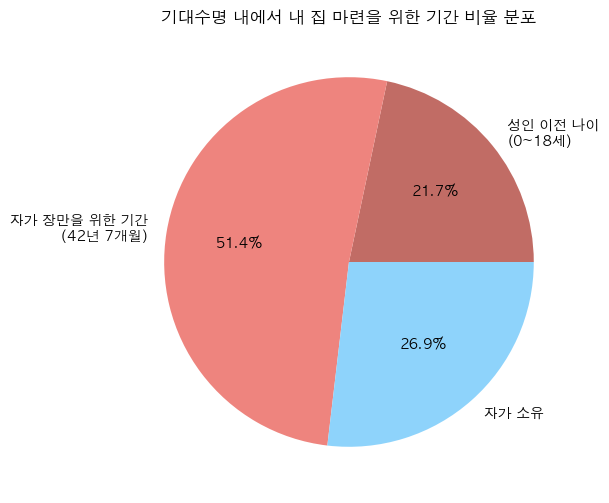

In [34]:
# avg_life(2020 ~ 2022년 평균 기대수명) -> 83
# resultData(평균적으로 가구당 서울 아파트를 구매하기 위해 필요한 시간) -> 42.7
# 성인이 되기 전의 나이 설정
before_adult = 18

# 파이 차트를 위한 데이터
data = [before_adult, resultData, avg_life - before_adult - resultData]
labels = ['성인 이전 나이\n(0~18세)', '자가 장만을 위한 기간\n(42년 7개월)', '자가 소유']

# 차트 색상 설정
colors = ['#C16C65', '#EE847E', '#8ED3FB']

# 파이 차트 생성
plt.figure(figsize=(10,6))

# autopct: 각 카테고리의 비율을 표시하는 형식(소수점 둘째 자리까지로 설정)
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('기대수명 내에서 내 집 마련을 위한 기간 비율 분포')
plt.show()

### (4) 분석 결과
* <u>서울 아파트의 평균 매매가격</u>과 <u>가구당 월평균 소득 및 소비지출</u>을 비교해 계산해본 결과, 평균적으로 한 가구가 서울 아파트를 구매하는 데에는 <b>약 42년 7개월</b>이 필요하다는 것을 확인
* 경제 활동을 시작할 수 있는 평균 나이인 '18세'와 주택을 마련하는 데 필요한 42년 7개월을 합하면, 기대수명(83세) 내에서 실제로 자신의 주택을 소유할 수 있는 기간은 <b>약 22년 6개월</b>에 불과하다는 사실 확인
* <b>서울시에서 아파트 매매가격이 가장 비싼 자치구는 어디일까?</b>
  * 평균 매매가격이 높은 자치구를 내림차순으로 정렬(하위 10개 자치구는 제외)하여 강남구의 평균 아파트 매매가격이 약 20억으로 가장 높은 것을 확인

## 3. 서울시 청약 통계

### (1) 데이터 읽어오기
- 지역별 청약 신청자 정보, 지역별 청약 당첨자 정보 csv 파일 읽고 데이터 확인하기

In [35]:
# 데이터 불러오기
applicant = pd.read_csv('/Users/im_gyuh2/data/한국부동산원 지역별 청약 신청자 정보.csv', encoding='EUC-KR')
winner = pd.read_csv('/Users/im_gyuh2/data/한국부동산원 지역별 청약 당첨자 정보.csv', encoding='EUC-KR')

In [36]:
# 청약 신청자 정보 상위 데이터 행 확인하기
applicant.head()

,연월,시도,30대 이하,40대,50대,60대 이상
0,2020-02,서울,32635,12302,5215,2953
1,2020-02,부산,9190,3649,2223,2010
2,2020-02,대구,30455,14673,7477,5815
3,2020-02,인천,7391,4739,2464,1339
4,2020-02,울산,13,4,1,2


In [37]:
# 청약 당첨자 정보 상위 데이터 행 확인하기
winner.head()

,연월,시도,30대 이하,40대,50대,60대 이상
0,2020-02,서울,392,291,167,112
1,2020-02,부산,455,150,67,50
2,2020-02,대구,319,209,88,40
3,2020-02,인천,680,229,92,50
4,2020-02,울산,13,4,1,2


### (2) 데이터 준비
* 주택 청약 신청자와 당첨자 데이터를 전처리하는 과정
* [연월] 열을 날짜 형식으로 변환한 후, '2020년 7월부터 2023년 6월까지'의 데이터 중 [시도] 열이 '서울시'인 데이터만 선택
* [연월] 열을 이용하여 '년도/분기'를 구하고, 각 '년도/분기'별로 '30대 이하'와 '40대'의 평균 신청자와 당첨자 수를 계산(통계함수 사용)
* 분기에 따른 각 연령대별(30대 이하, 40대) 청약 당첨자와 신청자 수의 변화를 쉽게 파악 가능

In [38]:
# '연월' 열을 날짜 형식으로 변환
applicant['연월'] = pd.to_datetime(applicant['연월'], format='%Y-%m')
winner['연월'] = pd.to_datetime(winner['연월'], format='%Y-%m')

# query 함수를 사용하여 조건에 맞는 필요한 데이터 선택
applicant = applicant.query("'2020-07' <= 연월 <= '2023-06' and 시도 == '서울'")
winner = winner.query("'2020-07' <= 연월 <= '2023-06' and 시도 == '서울'")

# 이미 '시도'가 서울인 데이터만 추출하였기 때문에 '시도' 열 제거
# '시도'와 '60대 이상' 열 제거
applicant = applicant.drop(['시도','50대','60대 이상'], axis=1)
winner = winner.drop(['시도','50대','60대 이상'], axis=1)

# '연월'을 이용하여 '년도/분기' 구하기(dt.to_period("Q") 함수 사용)
# '2023-01' -> '2023Q1' 변환
# astype(str): 문자열로 변환 
# 'Q' -> '/Q'로 변환(str.replace('Q', '/Q'))
# 최종 변환 결과: '2023Q1' -> '2023/Q1'로 표시
applicant['년도/분기'] = applicant['연월'].dt.to_period("Q").astype(str).str.replace('Q', '/Q')
winner['년도/분기'] = winner['연월'].dt.to_period("Q").astype(str).str.replace('Q', '/Q')

# '년도/분기'별 평균(통계함수) 신청자와 당첨자 구하기
# 1) groupby 함수를 사용하여 '년도/분기'별로 데이터를 그룹화
# 2) '30대 이하', '40대' 신청자 평균 계산
# 3) round(2): 결과를 소수점 둘째자리까지 표시
# 4) 인덱스 초기화
applicant = applicant.groupby('년도/분기')[['30대 이하', '40대']].mean().round(2).reset_index()
winner = winner.groupby('년도/분기')[['30대 이하', '40대']].mean().round(2).reset_index()

### (3) 데이터 탐색

#### 1) 청약 신청자 선 그래프 생성
- 연령대별 청약 신청자 수 시각화
- 선 그래프 선택 이유 
    - 시간에 따른 청약 신청자 수의 변화를 관찰하기 적합

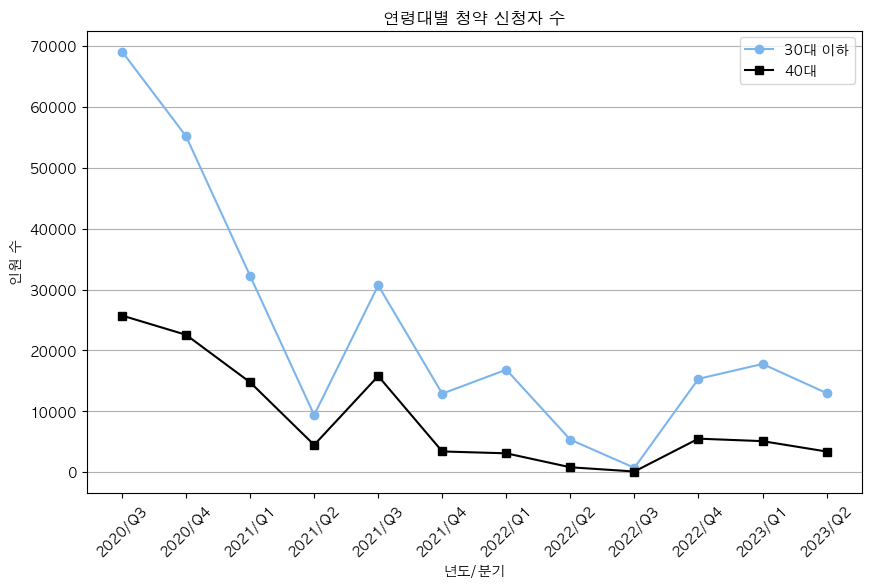

In [39]:
plt.figure(figsize=(10, 6))

# x축 -> '년도/분기', y축 -> '30대 이하', '40대'를 표시하는 선 그래프 생성
# 색상과 마커 설정 및 범례 지정
plt.plot(applicant['년도/분기'], applicant['30대 이하'], color='#7CB5EC', marker='o', label='30대 이하')
plt.plot(applicant['년도/분기'], applicant['40대'], color='black', marker='s', label='40대')

plt.xticks(rotation=45)  
plt.xlabel('년도/분기')
plt.ylabel('인원 수')
plt.title('연령대별 청약 신청자 수')
plt.grid(True, axis='y')
plt.legend()
plt.show()

#### 2) 청약 당첨자 선 그래프 생성
- 연령대별 청약 당첨자 수 시각화
- 선 그래프 선택 이유 
    - 시간에 따른 청약 당첨자 수의 변화를 관찰하기 적합

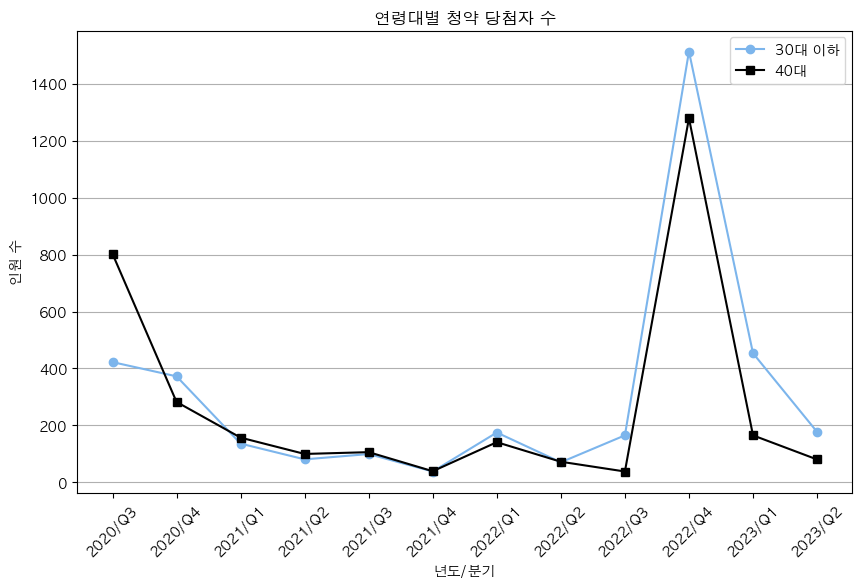

In [40]:
plt.figure(figsize=(10, 6))

# x축 -> '년도/분기', y축 -> '30대 이하', '40대'를 표시하는 선 그래프 생성
# 색상과 마커 설정 및 범례 지정
plt.plot(winner['년도/분기'], winner['30대 이하'], color='#7CB5EC', marker='o', label='30대 이하')
plt.plot(winner['년도/분기'], winner['40대'], color='black', marker='s', label='40대')

plt.xticks(rotation=45)  
plt.xlabel('년도/분기')
plt.ylabel('인원 수')
plt.title('연령대별 청약 당첨자 수')
plt.grid(True, axis='y')
plt.legend()
plt.show()

### (4) 분석 결과
* 2022년 3분기 기준으로 2030 세대와 40대의 서울시 민영 아파트 청약 당첨률 비교 결과, <u>2030 세대의 청약 당첨률이 40대보다 소폭 상승</u>하는 것을 확인
* 2030 세대의 청약 당첨 가능성 시사

## 4. '서울시 민영 아파트 청약 투기과열지구'와 '주요 자치구 아파트 평균 매매가격' 간의 상관관계

### 4-1) 서울시 민영 아파트 청약 투기과열지구
### (1) 데이터 읽어오기
- 한국부동산원 청약 APT 분양 정보 csv 파일 읽고 데이터 확인하기

In [41]:
# 데이터 불러오기
housing = pd.read_csv('/Users/im_gyuh2/data/한국부동산원 청약 APT 분양 정보.csv', encoding='UTF-8')

In [42]:
# 청약 APT 분양 정보 상위 데이터 행 확인하기
housing.head()

,주택관리번호,공고번호,주택명,주택구분코드,주택구분코드명,주택상세구분코드,주택상세구분코드명,분양구분코드,분양구분코드명,공급지역코드,...,사업주체명_시행사,입주예정월,투기과열지구,조정대상지역,분양가상한제,정비사업,공공주택지구,대규모택지개발지구,수도권내민영공공주택지구,모집공고URL
0,2023820013,2023820013,수원당수지구 A-4블록 신혼희망타운(공공분양) 추가모집,10,신혼희망타운,3,국민,0,분양주택,410,...,한국토지주택공사 경기남부지역본부,2023-07,N,N,Y,N,Y,Y,N,https://www.applyhome.co.kr/ai/aia/selectAPTLt...
1,2023820010,2023820010,화성봉담2 A-2블록 신혼희망타운(공공분양) 잔여세대,10,신혼희망타운,3,국민,0,분양주택,410,...,한국토지주택공사 경기남부지역본부,2023-04,N,N,Y,N,Y,Y,N,https://www.applyhome.co.kr/ai/aia/selectAPTLt...
2,2023820009,2023820009,화성능동 B-1블록 신혼희망타운(공공분양) 추가모집,10,신혼희망타운,3,국민,0,분양주택,410,...,한국토지주택공사 경기남부지역본부,2023-08,N,N,Y,N,Y,N,N,https://www.applyhome.co.kr/ai/aia/selectAPTLt...
3,2023820008,2023820008,과천지식정보타운 S-7블록 신혼희망타운(공공분양) 추가모집,10,신혼희망타운,3,국민,0,분양주택,410,...,한국토지주택공사 경기남부지역본부,2023-08,N,N,Y,N,Y,Y,N,https://www.applyhome.co.kr/ai/aia/selectAPTLt...
4,2023820007,2023820007,과천지식정보타운 S-3블록신혼희망타운(공공분양) 추가모집,10,신혼희망타운,3,국민,0,분양주택,410,...,한국토지주택공사 경기남부지역본부,2024-02,N,N,Y,N,Y,Y,N,https://www.applyhome.co.kr/ai/aia/selectAPTLt...


### (2) 데이터 준비

In [43]:
# query 함수를 사용하여 조건에 맞는 필요한 데이터 선택
# '공급지역명'-> '서울', '주택상세구분코드명' -> '민영', '주택구분코드명' -> 'APT, 
# '모집공고일' -> '2020-07-01 ~ 2023-06-30', '투기과열지구' -> 'Y'
housing = housing.query('공급지역명=="서울" & \
                         주택상세구분코드명=="민영" & \
                         주택구분코드명=="APT" & \
                         "2020-07-01" <= 모집공고일 <= "2023-06-30" & \
                         투기과열지구=="Y"')

# 필요한 열만 선택하여 데이터 프레임 생성
housing = housing[['주택명', '주택구분코드명', '주택상세구분코드명', '공급지역명', '공급위치', '모집공고일', '투기과열지구']]

# 인덱스 초기화
housing.reset_index(drop=True, inplace=True)

# 이미 위에서 필터링한 조건으로 중복값을 가지는 열들을 삭제
housing = housing.drop(['주택구분코드명', '주택상세구분코드명', '공급지역명', '투기과열지구'], axis=1)

# csv 파일로 저장(구글 스프레드 시트의 확장 프로그램 'Geocode'를 활용을 위함)
housing.to_csv('서울시 투기과열지구의 민영 아파트 청약 정보.csv', index=False, encoding='utf-8-sig')

In [44]:
# 위도와 경도가 추가된 데이터 불러오기
housing = pd.read_csv('/Users/im_gyuh2/data/Geocode_서울시 투기과열지구의 민영 아파트 청약 정보.csv', encoding='UTF-8')

In [45]:
# 열이름 변경
housing.rename(columns={'주택명': '아파트명', '공급위치': '주소','Latitude': '위도', 'Longitude':'경도'}, inplace = True)

In [46]:
# 각 행의 아파트명, 위도, 경도 데이터를 index 단위로 읽어오기(데이터 사전 확인 과정)
for n, row in housing.iterrows():
    print(n, row['아파트명'], row['위도'], row['경도'])

0 마포 더 클래시 37.555705 126.9504739
1 강동 헤리티지 자이 37.5391363 127.148678
2 올림픽파크 포레온 37.5228859 127.140539
3 화곡 더리브 스카이 주상복합아파트 37.5354007 126.8395126
4 장위자이 레디언트 37.6135897 127.0565872
5 리버센 SK VIEW 롯데캐슬 37.6029737 127.0756672
6 더샵 파크솔레이유 37.5299356 127.1447055
7 남구로역 동일 센타시아 37.4832237 126.889596
8 천왕역 모아엘가 트레뷰 37.4876579 126.8374911
9 신독산 솔리힐 뉴포레 37.4754794 126.9055514
10 창동 다우아트리체 주상복합 아파트 37.6509515 127.0366993
11 힐스테이트 세운 센트럴 2단지 37.5681711 126.9943464
12 힐스테이트 세운 센트럴 1단지 37.56795 126.9926911
13 서울대입구역 더하이브 센트럴 37.4858977 126.9571949
14 한화 포레나 미아 37.6193345 127.0221141
15 칸타빌 수유팰리스 37.6424383 127.0251265
16 신영지웰 에스테이트 개봉역 37.4955985 126.8576767
17 센트레빌 아스테리움 영등포 37.5215913 126.9093363
18 북서울자이 폴라리스 37.6274484 127.0186061
19 해링턴플레이스 안암 37.586288 127.0261105
20 우장산 한울에이치밸리움 37.5571826 126.8441688
21 e편한세상 강일 어반브릿지 37.555518 127.1809095
22 신림스카이아파트 37.4747925 126.9353614
23 브이티스타일 37.5739071 127.0724959
24 에비뉴 청계 II 37.5732172 127.0223876
25 래미안 원베일리 37.5049706 126.9958493
26 에비뉴 청계 I 37

### (3) 데이터 탐색
* folium 라이브러리를 사용하여 지도 생성하고, 서울시 민영아파트 청약 투기과열지구를 MarkerCluster로 지도에 표시
* 지도 시각화
  * 어느 지역이 청약 투기과열지구인지 지리적 분포를 통해 쉽게 파악 가능

In [47]:
# MarkerCluster로 표시할 지도 생성
# zoom_start: 초기 확대 정도 
# zoom_control: 확대 축소 버튼 표시 여부
# control_scale: 축척 컨트롤 표시 여부

anMap = folium.Map(location = [37.5791, 126.967],  #서울 중심
                   zoom_start=11,
                   zoom_control=False,
                   control_scale=True)

anMap  # 생성된 지도 출력

In [48]:
# 서울시 민영아파트 청약 투기과열지구를 MarkerCluster로 지도에 표시
# 강동구가 가장 많음

# MarkerCluster를 생성하고 지도에 추가
mc = MarkerCluster().add_to(anMap)

# 마커 위치: '위도'와 '경도' 열의 값 
# 팝업 내용: '아파트명' 열의 값
for i, row in housing.iterrows():
    folium.Marker(location = [row['위도'], row['경도']],
                  popup = folium.Popup(row['아파트명'], max_width=200),
                 icon=folium.Icon(color="green", icon="home", prefix='fa')).add_to(mc)


anMap  # 마커가 추가된 지도 출력

### 4-2) 서울시 주요 자치구 아파트 평균 매매가격
### (1) 데이터 읽어오기
- 앞서 전처리되어 저장된 서울 아파트 매매가격 파일(위도 & 경도 추가 등)을 읽고 데이터 확인하기

In [49]:
# 위도와 경도가 추가된 데이터 불러오기
apt_price = pd.read_csv('/Users/im_gyuh2/data/Geocode_서울 주요 자치구(동) 아파트 평균 매매가격.csv', encoding='UTF-8')

In [50]:
# 전처리된 서울 아파트 매매가격 파일 상위 데이터 행 확인하기
apt_price.head()

,주소(동),Latitude,Longitude,실거래가(만원)
0,서울특별시 강남구 개포동,37.480291,127.062627,204109.7
1,서울특별시 강남구 논현동,37.513679,127.031712,204109.7
2,서울특별시 강남구 대치동,37.499189,127.063346,204109.7
3,서울특별시 강남구 도곡동,37.488591,127.045276,204109.7
4,서울특별시 강남구 삼성동,37.513975,127.056127,204109.7


### (2) 데이터 준비

In [51]:
# 열이름 변경
apt_price.rename(columns={'Latitude': '위도', 'Longitude':'경도'}, inplace = True)

In [52]:
# 각 행의 실거래가(만원), 위도, 경도 데이터를 index 단위로 읽어오기(데이터 사전 확인 과정)
for n, row in apt_price.iterrows():
    print(n, row['실거래가(만원)'], row['위도'], row['경도'])

0 204109.7 37.4802905 127.0626272
1 204109.7 37.5136787 127.0317124
2 204109.7 37.4991887 127.0633458
3 204109.7 37.4885906 127.0452757
4 204109.7 37.513975 127.0561274
5 204109.7 37.4643619 127.1045971
6 204109.7 37.4863964 127.1006971
7 204109.7 37.5235332 127.0230659
8 204109.7 37.5271478 127.0334517
9 204109.7 37.5000776 127.0385419
10 204109.7 37.4708103 127.1120705
11 204109.7 37.4880579 127.0828672
12 204109.7 37.4762779 127.1003704
13 204109.7 37.5233931 127.0479736
14 94872.82 37.5674321 127.1733734
15 94872.82 37.5638217 127.1582312
16 94872.82 37.5396157 127.1459293
17 94872.82 37.5282539 127.1447139
18 94872.82 37.5490445 127.1508229
19 94872.82 37.5511028 127.1696401
20 94872.82 37.5304933 127.128992
21 94872.82 37.5578058 127.1310675
22 94872.82 37.5443765 127.1276202
23 115008.18 37.5478239 127.1047149
24 115008.18 37.5444007 127.092844
25 115008.18 37.5530406 127.0736767
26 115008.18 37.5505785 127.0817378
27 115008.18 37.531692 127.074516
28 115008.18 37.563544 127.088

### (3) 데이터 탐색
* folium 라이브러리를 사용하여 지도 생성하고, 서울시 주요 자치구의 아파트 평균 매매가격을 MarkerCluster로 지도에 표시
* 지도 시각화
  * 어느 지역의 아파트 매매가격이 높은지 지리적 분포를 통해 쉽게 파악 가능

In [53]:
# MarkerCluster로 표시할 지도 생성
anMap2 = folium.Map(location = [37.5791, 126.967],  #서울 중심
                   zoom_start=11,
                   zoom_control=False,
                   control_scale=True)

anMap2

In [54]:
# 서울시 주요 자치구 아파트 평균 매매가격을 MarkerCluster로 지도에 표시

# MarkerCluster를 생성하고 지도에 추가
mc2 = MarkerCluster().add_to(anMap2)


# 마커 위치: '위도'와 '경도' 열의 값 
# 팝업 내용: '실거래가(만원)' 열의 값
for i, row in apt_price.iterrows():
    folium.Marker(location = [row['위도'], row['경도']],
                  popup = folium.Popup(str(row['실거래가(만원)']), max_width=200),
                  icon=folium.Icon(color="red", icon="dollar-sign", prefix='fa')).add_to(mc2)

anMap2

### 4-3) 투기 과열 지구와 아파트 매매가격 간의 상관 관계 분석
### (1) 데이터 탐색
- 두 데이터셋의 정보(각각 다른 아이콘과 색상의 마커로 표시)를 한 지도에서 한 눈에 비교 가능
- housing 데이터셋: 서울시 청약 투기과열지구에 위치한 아파트들의 정보
- apt_price 데이터셋: 서울시 아파트의 상위 매매가격(평균) 정보

In [55]:
# MarkerCluster로 표시할 지도 생성
anMap3 = folium.Map(location = [37.5791, 126.967],  #서울 중심
                   zoom_start=11,
                   zoom_control=False,
                   control_scale=True)

anMap3

In [56]:
# 첫 번째 데이터(housing - 투기과열지구)에 대한 MarkerCluster를 생성하고 지도에 추가
mc3 = MarkerCluster().add_to(anMap3)

# 마커 위치: '위도'와 '경도' 열의 값 
# 팝업 내용: '아파트명' 열의 값
# 마커 아이콘: 녹색 집 모양
for i, row in housing.iterrows():
    folium.Marker(location = [row['위도'], row['경도']],
                  popup = folium.Popup(row['아파트명'], max_width=200),
                  icon=folium.Icon(color="green", icon="home", prefix='fa')).add_to(mc3)

# 두 번째 데이터(apt_price - 아파트 평균 매매가격)에 대한 MarkerCluster를 생성하고 지도에 추가
mc4 = MarkerCluster().add_to(anMap3)

# 마커 위치: '위도'와 '경도' 열의 값 
# 팝업 내용: '실거래가(만원)' 열의 값
# 마커 아이콘: 빨간색 달러 기호
for i, row in apt_price.iterrows():
    folium.Marker(location = [row['위도'], row['경도']],
                  popup = folium.Popup(str(row['실거래가(만원)']), max_width=200),
                  icon=folium.Icon(color="red", icon="dollar-sign", prefix='fa')).add_to(mc4)

anMap3

### (4) 분석 결과
* <u>서울시 아파트 평균 매매가격이 높은 지역</u>과 <u>청약 투기 과열 지구</u>가 상당 부분 <b>겹친다</b>는 것을 지도 시각화를 통해 확인
* 서울 주요 자치구에서 2030 세대가 주택을 마련하기 어려운 상황
* 일반 청약 당첨만으로는 집을 마련하는 것이 실질적으로 어려움

## V. 데이터 분석 결과

### 1. <u>종합적인 분석 결과</u>
* 가구당 서울 아파트 매매까지 <u><b>평균 42년 7개월</b></u> 소요
* 특히 집 값이 비싼 지역인 강남구의 경우, 주택 소유 기간이 기대 수명 내에 맞춰질 수 없다는 심각한 문제 존재
* 2030 세대의 청약 당첨률이 소폭 상승하고 있지만, 아파트 매매가격이 높은 지역과 청약 투기 과열 지구가 크게 겹치는 점을 고려하면 <u><b>서울 주요 자치구에 2030 세대의 주택 마련이 여전히 어려운 상황</b></u>임을 확인 가능
<br><br>

### 2. <u>해결 방향 및 활용 방안</u>
<b>[해결 방향]</b>
* 주택 구입을 위한 다양한 금융 지원 방안 모색 및 청약 당첨률을 높이는 정책 강화
  * 현재 소득이 있는 청년이라면 <u><b>청년 우대형 청약 통장</b></u>에 가입하여 최저 금리와 주택 담보 대출 혜택 활용
  * 2024년 출시 예정인 <u><b>청년 주택드림 청약 통장</b></u>(기존 청년 우대형 청약 통장을 완화 개편)의 혜택 활용  
    
<b>[활용 방안]</b>
* 정부 및 관련 기관들이 2030 세대의 주택 구입에 대한 현실적인 어려움을 인지하고, 그에 맞는 개선책을 마련하는데 도움이 될 것
* 2030 세대는 위 분석을 바탕으로 자신의 주택 구입 전략을 세우는데 활용할 수 있을 것으로 기대